In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [141]:
cat = load_img('data/cat/cat1.jpg',target_size = (255,255))
cat

FileNotFoundError: [Errno 2] No such file or directory: 'data/cat/cat1.jpg'

In [117]:
catArr = img_to_array(cat)
catArr

array([[[137., 124., 107.],
        [153., 140., 123.],
        [140., 127., 110.],
        ...,
        [191., 179., 155.],
        [192., 175., 155.],
        [190., 173., 153.]],

       [[147., 134., 117.],
        [151., 138., 121.],
        [136., 123., 106.],
        ...,
        [192., 180., 156.],
        [193., 178., 157.],
        [190., 175., 154.]],

       [[136., 123., 106.],
        [159., 146., 129.],
        [138., 125., 108.],
        ...,
        [190., 178., 154.],
        [187., 175., 153.],
        [185., 173., 151.]],

       ...,

       [[ 26.,  21.,  15.],
        [ 27.,  23.,  14.],
        [ 28.,  24.,  13.],
        ...,
        [129., 118., 100.],
        [119., 114.,  92.],
        [121., 116.,  94.]],

       [[ 26.,  21.,  15.],
        [ 27.,  23.,  14.],
        [ 27.,  23.,  12.],
        ...,
        [128., 117.,  99.],
        [119., 114.,  92.],
        [120., 115.,  93.]],

       [[ 25.,  20.,  14.],
        [ 26.,  22.,  13.],
        [ 27.,  

# 여러 이미지 한번에 불러오기 (ImageDataGenerator)

In [119]:
imageGen = ImageDataGenerator(rescale = 1./255)
trainGen = imageGen.flow_from_directory('./data/image', target_size = (98,98))

Found 20 images belonging to 2 classes.


In [120]:
print(type(trainGen))

<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [129]:
X_train, y_train = trainGen.next() # 32개만 리턴

In [130]:
X_train

array([[[[0.00784314, 0.10196079, 0.0509804 ],
         [0.04705883, 0.05490196, 0.01176471],
         [0.03529412, 0.12156864, 0.03137255],
         ...,
         [0.3921569 , 0.40000004, 0.38823533],
         [0.43921572, 0.38823533, 0.35686275],
         [0.07843138, 0.07843138, 0.07843138]],

        [[0.01176471, 0.06666667, 0.06666667],
         [0.03921569, 0.0627451 , 0.02352941],
         [0.09803922, 0.227451  , 0.10588236],
         ...,
         [0.38823533, 0.39607847, 0.38431376],
         [0.4431373 , 0.3921569 , 0.36078432],
         [0.07450981, 0.07450981, 0.07450981]],

        [[0.01960784, 0.03921569, 0.0509804 ],
         [0.        , 0.02352941, 0.        ],
         [0.01568628, 0.1254902 , 0.02745098],
         ...,
         [0.36862746, 0.37647063, 0.3647059 ],
         [0.40784317, 0.35686275, 0.3254902 ],
         [0.10196079, 0.10196079, 0.10196079]],

        ...,

        [[0.08627451, 0.08627451, 0.04705883],
         [0.05490196, 0.05490196, 0.01568628]

In [123]:
trainGen.class_indices # 라벨 확인

{'cat': 0, 'dog': 1}

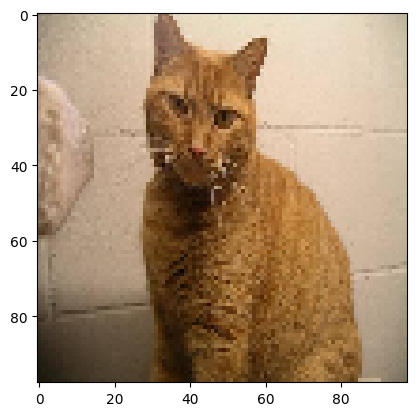

In [124]:
plt.imshow(X_train[0])
plt.show()

In [69]:
y_train.argmax(axis = 1)

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [70]:
y_train[0]

array([1., 0.], dtype=float32)

In [71]:
# 기본 딥러닝 학습
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Flatten(input_shape = (98,98,3)))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 28812)             0         
                                                                 
 dense_24 (Dense)            (None, 64)                1844032   
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 2)                 66        
                                                                 
Total params: 1846178 (7.04 MB)
Trainable params: 1846178 (7.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
#model.fit(X_train, y_train, epochs = 20)
model.fit( trainGen, epochs = 20) # 1epoch당 32개씩 

Epoch 1/20
1/1 [==============================] - 1s 695ms/step - loss: 0.6815 - acc: 0.6500
Epoch 2/20
1/1 [==============================] - 0s 57ms/step - loss: 5.3178 - acc: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 59ms/step - loss: 5.5753 - acc: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 62ms/step - loss: 1.3751 - acc: 0.5500
Epoch 5/20
1/1 [==============================] - 0s 61ms/step - loss: 8.5476 - acc: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 62ms/step - loss: 7.1871 - acc: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 65ms/step - loss: 3.4314 - acc: 0.5000
Epoch 8/20
1/1 [==============================] - 0s 67ms/step - loss: 0.4020 - acc: 0.8500
Epoch 9/20
1/1 [==============================] - 0s 60ms/step - loss: 2.6221 - acc: 0.5500
Epoch 10/20
1/1 [==============================] - 0s 61ms/step - loss: 2.1299 - acc: 0.6000
Epoch 11/20
1/1 [==============================] - 0s 66ms/step - loss: 0.2612

# 딥러닝을 통한 학습

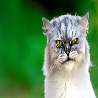

In [74]:
testImg = load_img('./data/image/test.jpg', target_size = (98,98))
testImg

In [78]:
testArr = img_to_array(testImg) / 255.
testArr

array([[[0.00392157, 0.29803923, 0.02745098],
        [0.00392157, 0.30588236, 0.02352941],
        [0.00784314, 0.30980393, 0.02745098],
        ...,
        [0.23137255, 0.47058824, 0.06666667],
        [0.2509804 , 0.4745098 , 0.07058824],
        [0.2784314 , 0.49803922, 0.07843138]],

       [[0.00392157, 0.29803923, 0.02745098],
        [0.00392157, 0.30588236, 0.02352941],
        [0.00784314, 0.30980393, 0.02745098],
        ...,
        [0.20392157, 0.4509804 , 0.04313726],
        [0.23137255, 0.45490196, 0.05098039],
        [0.27450982, 0.49803922, 0.07843138]],

       [[0.00392157, 0.29803923, 0.02745098],
        [0.00392157, 0.30588236, 0.02352941],
        [0.00784314, 0.30980393, 0.02745098],
        ...,
        [0.17254902, 0.42745098, 0.01960784],
        [0.21568628, 0.44313726, 0.03921569],
        [0.27058825, 0.49411765, 0.07450981]],

       ...,

       [[0.32156864, 0.45882353, 0.2       ],
        [0.33333334, 0.45882353, 0.21176471],
        [0.34117648, 0

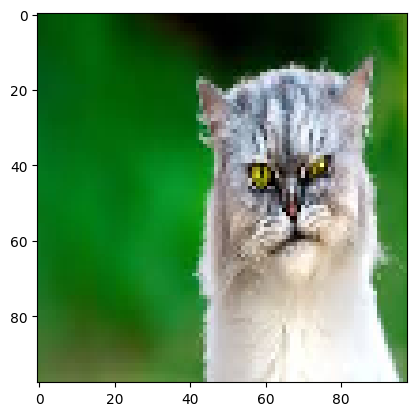

In [80]:
plt.imshow(testArr)
plt.show()

In [87]:
d = trainGen.class_indices
d = list(zip(d.values(), d.keys()))

In [93]:
def decode(arg) :
    d = trainGen.class_indices
    d = dict(zip(d.values(), d.keys()))
    return d[arg]

In [94]:
# 새로운 데이터로 확인
decode(int(model.predict(testArr.reshape(1,98,98,3)).argmax(axis = 1)))

1/1 [==============================] - 0s 31ms/step


'cat'

In [95]:
model.save('catdog.h5')

C:\Users\NT551XCJ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# CNN을 활용해 분류 진행

In [132]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (4,4), strides = 1, input_shape = (98,98,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (4,4), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten()) 
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 98, 98, 16)        784       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 49, 49, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 46, 46, 32)        8224      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 16928)             0         
                                                                 
 dense_35 (Dense)            (None, 32)              

In [133]:
X_train.shape, y_train.shape

((20, 98, 98, 3), (20, 2))

In [127]:
y_train = y_train.argmax(axis = 1).reshape(-1,)

In [134]:
model.fit(X_train.reshape(20,98,98,3), y_train, epochs = 10)

Epoch 1/10
1/1 [==============================] - 1s 692ms/step - loss: 0.6864 - acc: 0.5500
Epoch 2/10
1/1 [==============================] - 0s 93ms/step - loss: 0.9086 - acc: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 96ms/step - loss: 0.7691 - acc: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 96ms/step - loss: 0.7090 - acc: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 101ms/step - loss: 0.5826 - acc: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 94ms/step - loss: 0.5533 - acc: 0.7000
Epoch 7/10
1/1 [==============================] - 0s 95ms/step - loss: 0.5727 - acc: 0.6000
Epoch 8/10
1/1 [==============================] - 0s 92ms/step - loss: 0.5231 - acc: 0.6500
Epoch 9/10
1/1 [==============================] - 0s 93ms/step - loss: 0.4723 - acc: 0.9000
Epoch 10/10
1/1 [==============================] - 0s 98ms/step - loss: 0.4429 - acc: 0.9500


In [138]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [140]:
# 성능 확인
print(classification_report(y_train.argmax(axis = 1),model.predict(X_train).argmax(axis = 1)))

1/1 [==============================] - 0s 44ms/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

